In [1]:
## 2012-03-11_New goal model with neural network ##
## python 3.8 ##
## Sangil Lee ##

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/home/lscall/Dropbox/Ubuntu 18.04/Ubuntu_share/20210122-New Goal Model/experiment data/legacy data/original data/training1.csv', names=['Productivity', 'Efficiency', 'Utilization', 'Flexibility', 'Cost', 'Profits'], engine='python')
df.head()

,Productivity,Efficiency,Utilization,Flexibility,Cost,Profits
0,0.920574,0.326861,0.527807,0.203113,0.994426,1.306219
1,0.484593,0.108276,0.388172,0.465689,0.173284,1.358122
2,0.827789,0.865967,0.930056,0.558215,0.152119,2.302618
3,0.205889,0.216347,0.878902,0.329863,0.244587,0.734088
4,0.066839,0.429225,0.497779,0.009710,0.271564,0.806973


In [ ]:
sns.pairplot(df)

In [3]:
from sklearn.model_selection import train_test_split
X = df[['Productivity', 'Efficiency', 'Utilization', 'Flexibility', 'Cost']].values
y = df[['Profits']].values

In [4]:
X

array([[0.92057372, 0.32686065, 0.52780669, 0.20311267, 0.99442558],
       [0.48459348, 0.10827637, 0.38817224, 0.46568875, 0.17328433],
       [0.82778931, 0.86596672, 0.93005615, 0.55821538, 0.15211851],
       ...,
       [0.82168034, 0.93646112, 0.00314821, 0.00285173, 0.53982852],
       [0.52725431, 0.20996056, 0.42383289, 0.97799274, 0.69523369],
       [0.0615228 , 0.41083936, 0.49447771, 0.3243635 , 0.73257585]])

In [5]:
y

array([[1.30621905],
       [1.35812197],
       [2.30261753],
       [0.73408755],
       [0.80697254],
       [1.45932564],
       [0.56114984],
       [2.75565098],
       [3.10384657],
       [1.48691726],
       [1.52815826],
       [1.65006081],
       [1.97821227],
       [0.68075801],
       [1.39079598],
       [1.14289399],
       [2.01273323],
       [1.91872506],
       [0.95762171],
       [1.99657347],
       [0.6236477 ],
       [0.5965675 ],
       [2.40935148],
       [1.11875536],
       [1.17468912],
       [1.74266089],
       [1.61768786],
       [2.66357039],
       [2.10398569],
       [1.08494462],
       [1.91390064],
       [2.66113086],
       [1.20033323],
       [0.66082054],
       [0.48505627],
       [0.86428119],
       [2.61656154],
       [1.03243024],
       [2.60463279],
       [0.89947891],
       [1.04860881],
       [1.31851363],
       [1.15982243],
       [0.97981852],
       [1.98755327],
       [2.1132921 ],
       [1.50737365],
       [1.879

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [7]:
X_train.shape

(250, 5)

In [8]:
X_test.shape

(250, 5)

In [ ]:
## Normalization and fit the data ##

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
## data transform ##

X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [9]:
## neual network model set up ##

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import models
from keras import layers
import keras.backend as K
from keras.utils.generic_utils import get_custom_objects

def gaussian(x):
    return K.exp(-K.pow(x,2))

get_custom_objects().update({'gaussian': Activation(gaussian)})

In [11]:
## neual network model layer ##
# create model

def get_model():
    
    model = Sequential([
        Dense(5, input_shape = (5,), activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
        )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 4,585
Trainable params: 4,585
Non-trainable params: 0
______________________________________________________

In [12]:
# Fit the model
model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
8/8 [==============================] - 1s 4ms/step - loss: 2.3284
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.1346
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4624
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.9298
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6146
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4899
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.4329
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3869
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4046
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3296
Epoch 11/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3035
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 13/1000
8/8 [==============================

8/8 [==============================] - 0s 4ms/step - loss: 0.0370
Epoch 104/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 105/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 106/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0377
Epoch 107/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 108/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 109/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 110/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 111/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0332
Epoch 112/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 113/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 114/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 115/1000
8/8 [=======================

8/8 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 205/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 206/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 207/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 208/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 209/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 210/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 211/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 212/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 213/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 214/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 215/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 216/1000
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 306/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 307/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 308/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 309/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 310/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 311/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 312/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 313/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 314/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 315/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 316/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 317/1000
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 407/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 408/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 409/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 410/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 411/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 412/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 413/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 414/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 415/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 416/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 417/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 418/1000
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 508/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 509/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 510/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 511/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 512/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 513/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 514/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 515/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 516/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 517/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 518/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 519/1000
8/8 [=======================

8/8 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 609/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 610/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 611/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 612/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 613/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 614/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 615/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 616/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 617/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 618/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 619/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 620/1000
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 710/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 711/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 712/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 713/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 714/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 715/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 716/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 717/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 718/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 719/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 720/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 721/1000
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 811/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 812/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 813/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 814/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 815/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 816/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 817/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 818/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 819/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 820/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 821/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 822/1000
8/8 [=======================

8/8 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 911/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 912/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 913/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 914/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 915/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 916/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 917/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 918/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 919/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 920/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 921/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 922/1000
8/8 [=======================

In [13]:
# Look at the training history
loss_df = pd.DataFrame(model.history.history['loss'])

<AxesSubplot:>

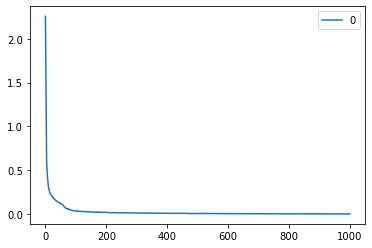

In [14]:
# Plot the losses
loss_df.plot()

In [15]:
# Model Evaluation
# Method 1
model.evaluate(X_test, y_test, verbose = 0)

0.05657060444355011

In [16]:
model.evaluate(X_train, y_train, verbose = 0)

0.0023173631634563208

In [17]:
test_predictions = model.predict(X_test)

In [18]:
test_predictions = pd.Series(test_predictions.reshape(250,))

In [19]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df

,Test True Y
0,1.135579
1,1.353619
2,1.221340
3,0.885502
4,0.675933
...,...
245,0.120175
246,1.105094
247,0.680758
248,0.609848


In [20]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df

,Test True Y,0
0,1.135579,0.948219
1,1.353619,1.411281
2,1.221340,1.366777
3,0.885502,0.745550
4,0.675933,0.462030
...,...,...
245,0.120175,0.086680
246,1.105094,0.974528
247,0.680758,0.302806
248,0.609848,0.737391


In [21]:
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,1.135579,0.948219
1,1.353619,1.411281
2,1.221340,1.366777
3,0.885502,0.745550
4,0.675933,0.462030
...,...,...
245,0.120175,0.086680
246,1.105094,0.974528
247,0.680758,0.302806
248,0.609848,0.737391


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

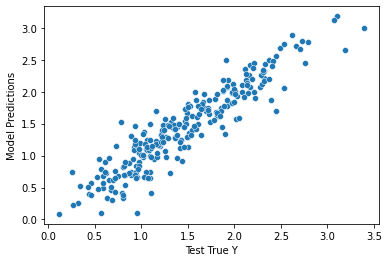

In [22]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data=pred_df)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.1813231322879342

In [25]:
df.describe()

,Productivity,Efficiency,Utilization,Flexibility,Cost,Profits
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.485033,0.502687,0.498929,0.511487,0.493451,1.437711
std,0.287185,0.298800,0.285695,0.294206,0.296256,0.638877
min,0.001588,0.000965,0.001264,0.002852,0.000454,0.120175
25%,0.227320,0.216063,0.247879,0.257727,0.228805,0.947447
50%,0.476073,0.496219,0.502359,0.535935,0.501299,1.374400
75%,0.732618,0.762582,0.742396,0.768167,0.746639,1.909524
max,0.998899,0.998522,0.998820,0.999955,0.998971,3.576721


In [26]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.056570610174937655

In [27]:
preds = model.predict(X_test)

evals = model.evaluate(X_test, y_test)

print(evals)
print(preds[0:500])

8/8 [==============================] - 0s 3ms/step - loss: 0.0566
0.05657060444355011
[[0.9482186 ]
 [1.411281  ]
 [1.3667771 ]
 [0.74555045]
 [0.46203035]
 [2.2622867 ]
 [2.4347446 ]
 [0.6128279 ]
 [1.8680347 ]
 [1.1517668 ]
 [2.7140622 ]
 [1.8965232 ]
 [2.2203357 ]
 [1.0409919 ]
 [0.611782  ]
 [1.6723026 ]
 [1.7021071 ]
 [1.4166511 ]
 [2.3301907 ]
 [1.9581144 ]
 [1.5190109 ]
 [2.4531064 ]
 [1.6206733 ]
 [0.69681436]
 [2.17791   ]
 [2.6805062 ]
 [0.7291041 ]
 [0.732211  ]
 [1.8231742 ]
 [0.4863501 ]
 [1.4404429 ]
 [1.7436692 ]
 [1.8335546 ]
 [2.0773146 ]
 [1.1357994 ]
 [1.9816687 ]
 [2.6586678 ]
 [0.41441667]
 [0.3943497 ]
 [0.38400006]
 [0.8884507 ]
 [1.1341541 ]
 [1.5329555 ]
 [2.0732963 ]
 [0.66342235]
 [1.7828981 ]
 [0.7387347 ]
 [1.3102149 ]
 [2.1909966 ]
 [0.25985828]
 [2.7485614 ]
 [1.6785085 ]
 [2.128594  ]
 [0.53311616]
 [1.6373526 ]
 [2.16333   ]
 [1.1016144 ]
 [1.698522  ]
 [2.5534468 ]
 [1.3498157 ]
 [2.2602727 ]
 [0.796204  ]
 [2.205284  ]
 [0.47417694]
 [0.89978606]
 [1.

In [28]:
## change the input value which are initial value from machine learning

sample_dataset = tf.convert_to_tensor([[0.1, 0.1, 0.1, 0.1, 0.1]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[0.94307756]]


In [29]:
## sample code to predict goal model value


sample_dataset = tf.convert_to_tensor([[0.920574, 0.326861, 0.527807, 0.203113, 0.994426]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[1.2816703]]
